In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 9

In [2]:
Nstep=200  #numero di step
x=np.arange(Nstep)+1  #vettore delle ascisse dei punti plottati

## Città lungo una circonferenza

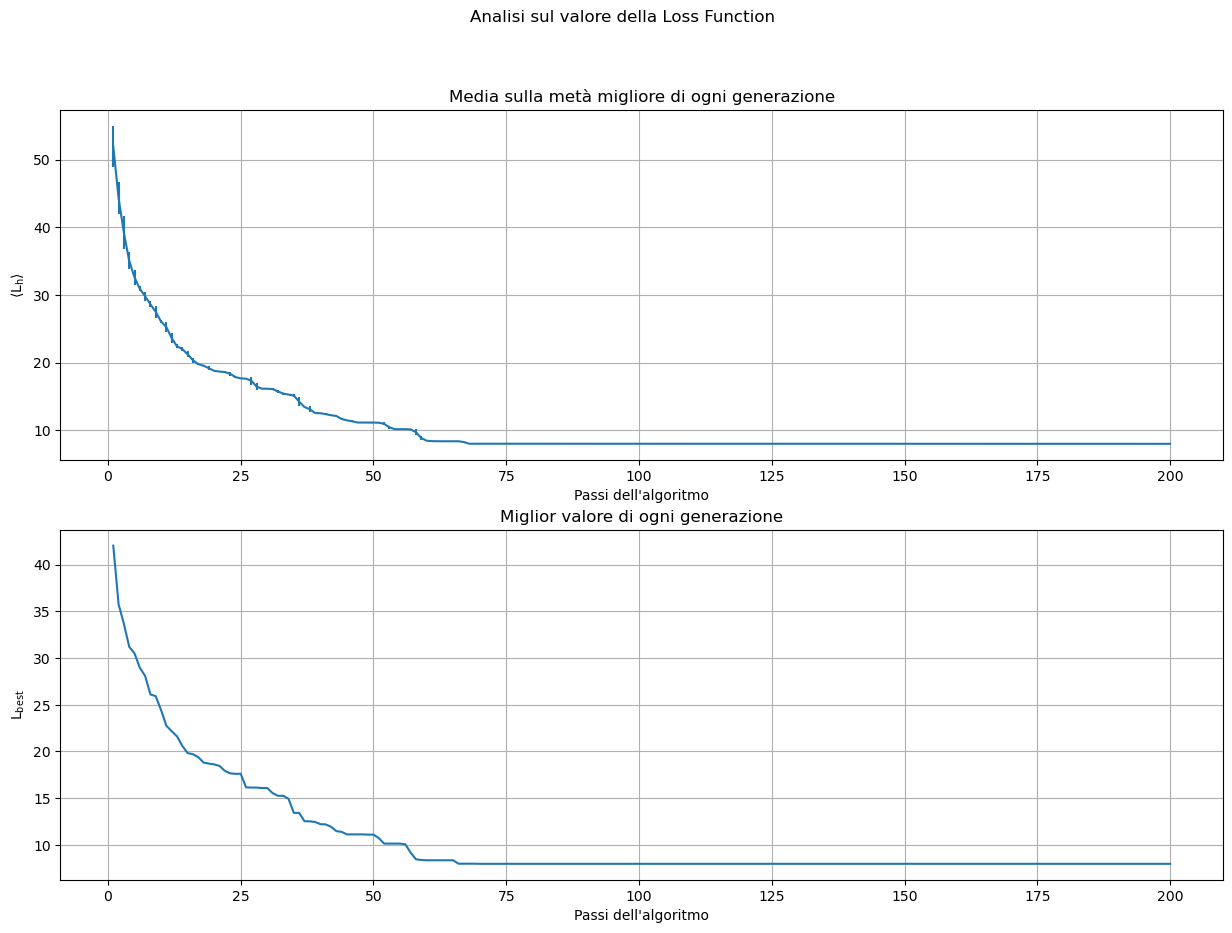

In [3]:
cbestL=np.loadtxt("cbestloss.dat",  unpack="true")
cmeanL, cerrorsL=np.loadtxt("cbesthalfloss.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

cfig ,(cplt1, cplt2) = plt.subplots(2, 1, figsize=(15, 10))

cplt1.errorbar(x, cmeanL, yerr=cerrorsL)
cplt1.set_xlabel("Passi dell'algoritmo")
cplt1.set_ylabel(r"$\left<\mathrm{L_h}\right>$")
cplt1.set_title("Media sulla metà migliore di ogni generazione")
cplt1.grid(True)

cplt2.plot(x, cbestL)
cplt2.set_xlabel("Passi dell'algoritmo")
cplt2.set_ylabel(r"$\mathrm{L_{best}}$")
cplt2.set_title("Miglior valore di ogni generazione")
cplt2.grid(True)

cfig.suptitle("Analisi sul valore della Loss Function")
plt.show()

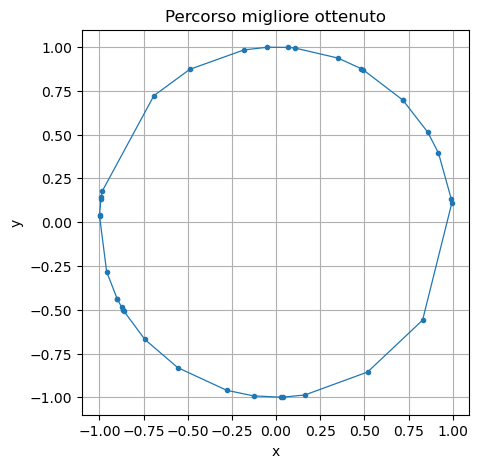

In [4]:
cpathx, cpathy=np.loadtxt("cbestpath.dat", usecols=(0, 1),  unpack="true")

plt.figure(figsize=(5, 5))
plt.plot(cpathx, cpathy, marker='.', linewidth=0.9)
plt.grid()
plt.title("Percorso migliore ottenuto")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Città in un quadrato

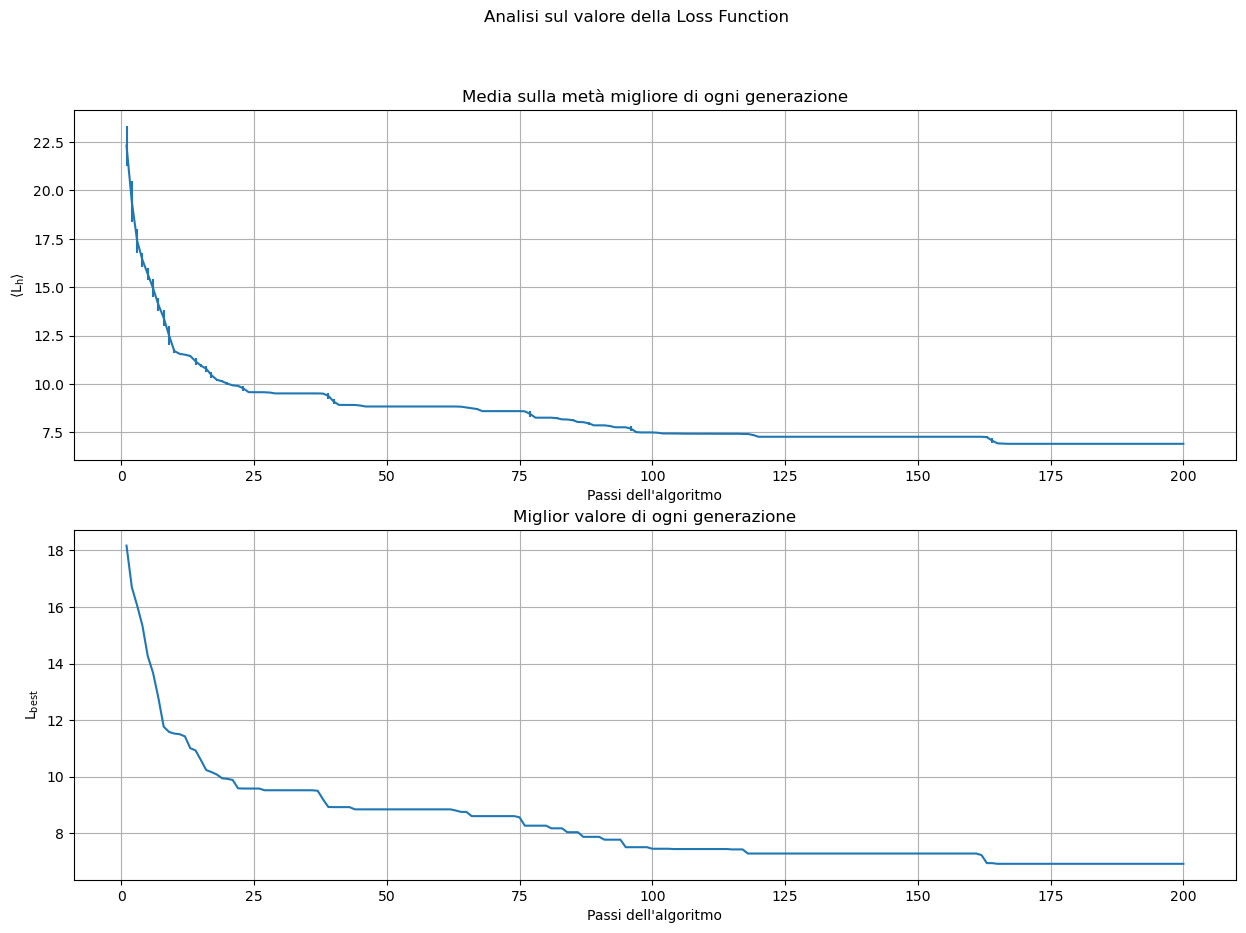

In [5]:
sbestL=np.loadtxt("sbestloss.dat",  unpack="true")
smeanL, serrorsL=np.loadtxt("sbesthalfloss.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

sfig ,(splt1, splt2) = plt.subplots(2, 1, figsize=(15, 10))

splt1.errorbar(x, smeanL, yerr=serrorsL)
splt1.set_xlabel("Passi dell'algoritmo")
splt1.set_ylabel(r"$\left<\mathrm{L_h}\right>$")
splt1.set_title("Media sulla metà migliore di ogni generazione")
splt1.grid(True)

splt2.plot(x, sbestL)
splt2.set_xlabel("Passi dell'algoritmo")
splt2.set_ylabel(r"$\mathrm{L_{best}}$")
splt2.set_title("Miglior valore di ogni generazione")
splt2.grid(True)

sfig.suptitle("Analisi sul valore della Loss Function")
plt.show()

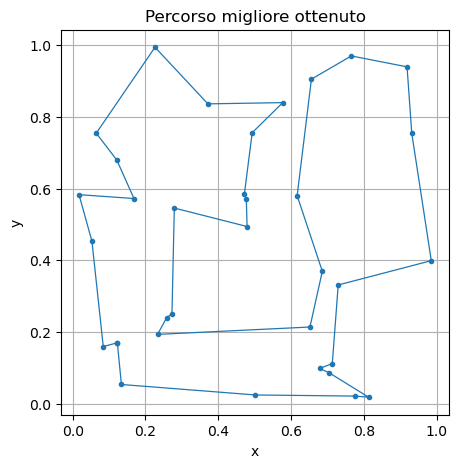

In [6]:
spathx, spathy=np.loadtxt("sbestpath.dat", usecols=(0, 1),  unpack="true")

plt.figure(figsize=(5, 5))
plt.plot(spathx, spathy, marker='.', linewidth=0.9)
plt.grid()
plt.title("Percorso migliore ottenuto")
plt.xlabel("x")
plt.ylabel("y")
plt.show()